<a href="https://colab.research.google.com/github/adidror005/youtube-videos/blob/main/old_videos/LLAMA_3_Actual_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLAMA3 Meta's new open source model family!
* https://huggingface.co/blog/llama3
* https://llama.meta.com/docs/get-started/

* Model Variants: Llama 3 is offered in two sizes:
  * 8B parameters for efficient deployment on consumer-size GPUs.
  * 80B parameters designed for large-scale AI native applications.
Both sizes come in base and instruction-tuned variants.

* Llama Guard 2: A new safety feature, Llama Guard 2, fine-tuned on the 8B model, has been released to improve content safety in AI interactions.

#### Model Details:
* Four new models based on the Llama 2 architecture, now with a context length of 8K tokens.
* Includes a new tokenizer with an expanded vocabulary size of 128,256 tokens, enhancing multilingual capabilities.
* Uses Grouped-Query Attention (GQA) in the 8B model to improve handling of longer contexts.
* Training and Optimization: Trained on over 15 trillion tokens using a mix of publicly available data on 24,000 GPUs.
* The instruction-tuned variants have been specially optimized for dialogue applications.

#### NOTE

Usually the model especially the 80B param one will be hosted somewhere and you will call it from an API since it is large, but we will show how to do it locally on our colab server and just use the 8B one which is very good!

### Requirements:
* A GPU with enough memory!

### Installs
* They suggest using latest version of transformers


In [ ]:
!pip install -U "transformers==4.40.0" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1


### Need to fill out form to get permission to use Meta LLAMA3 model
* When you load model without it you get error and then you fill form they direct you to and a little later like even less than an hour they approve form my experience.

### Login to HuggingFace hub to put your LLama token

* put token
* Can answer N for github question

In [19]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read)

### Demonstration of LLAMA3 as is for sentiment analysis
* First time it download model so can take time
* Use pipeline to streamline process of applying tokenizor, applying mode to generate tokens, and then decoding them to human text.

In [20]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

pipeline = transformers.pipeline(
    task="text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16}, # Load model in precision of Meta's checkpoint.(also safe to use float16)
    device="cuda",
)


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Device set to use cuda


#### We can inspect the model

In [21]:
pipeline.model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((4096,), eps=1e-05)
    (rotary_

#### We can inspect the tokenizer

In [22]:
pipeline.tokenizer

PreTrainedTokenizerFast(name_or_path='meta-llama/Meta-Llama-3-8B-Instruct', vocab_size=128000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	128000: AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128001: AddedToken("<|end_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128002: AddedToken("<|reserved_special_token_0|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128003: AddedToken("<|reserved_special_token_1|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128004: AddedToken("<|reserved_special_token_2|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128005: AddedToken("<

### The helper method, *pipeline.apply_chat_template* formats the text in the correct format for the instruct model


In [23]:
messages = [
    {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral!"},
    {"role": "user", "content": "TSLA slashes model Y prices?"},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)


print(prompt)
prompt_full_explanation = prompt

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

TSLA slashes model Y prices?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




#### Define terminators for end of generation.
Assistant responses may end with special token <|eot_id|>, but must also stop geneation if regular EOS token found

In [24]:
terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

### Apply pipeline and generate text
* do_sample = False (make it not random)
* temperature is measure of randomness the higher than more random
* top_p: Instead of sampling only from the most likely K words, in Top-p sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability p .

In [25]:
outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    #top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Based on the text, I would classify the sentiment as bearish. The word "slashes" implies a decrease in price, which is a negative event for investors and a bearish signal.


### This is amazing and to be honest better than what I experienced even from GPT 4 in this context!

* But if we want only a 1 word response ("Bullish","Bearish","Neutral") then we should add further instructions to try to force the response!

From my expereience this is a significiant improvmeent from LLama2  7B params where you needed some prompt engineering creativity to get the answer back as one word.

In [26]:
messages = [
    {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word"},
    {"role": "user", "content": "TSLA slashes model Y prices?"},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

print(prompt)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>

TSLA slashes model Y prices?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [27]:
outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    #temperature=0.6,
    #top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Bearish


### Youtube Video Describing How to get Dataset
* Only really need first 3 mins of video

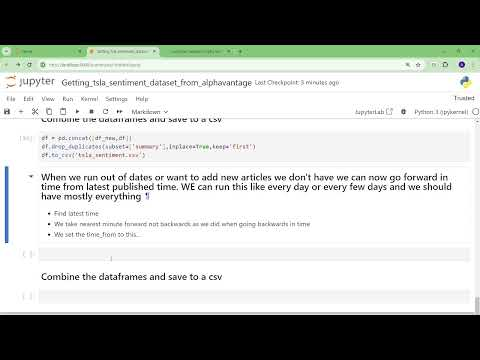

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('ascf3y7zSaY')

#### Load TSLA sentiment analysis dataset (derived from Alpha-vantage)


In [29]:
import pandas as pd
df = pd.read_csv("tsla_sentiment.csv")
df

,time_published,Unnamed: 0,title,url,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment,ticker_relevance_TSLA,ticker_sentiment_TSLA,num_tickers,detailed_original_label,label
0,20220826T050500,0.0,Tesla wants videos of its vehicles crashing ki...,https://www.business-standard.com/article/comp...,['IANS'],The controversy surrounding the safety of Tesl...,https://bsmedia.business-standard.com/_media/b...,Business Standard,Companies,www.business-standard.com,"[{'topic': 'Manufacturing', 'relevance_score':...",-0.081140,Neutral,"[{'ticker': 'TSLA', 'relevance_score': '0.8161...",0.816190,-0.117429,1,Neutral,Neutral
1,20220826T090034,1.0,Tesla's shoddy wheel symbolizes everything tha...,https://www.fastcompany.com/90782332/teslas-sh...,[],Tesla Model S's shoddy yoke is more quality as...,https://images.fastcompany.net/image/upload/w_...,Fast Company,NaN,www.fastcompany.com,"[{'topic': 'Manufacturing', 'relevance_score':...",-0.172546,Somewhat-Bearish,"[{'ticker': 'TSLA', 'relevance_score': '0.2815...",0.281584,-0.148169,1,Neutral,Neutral
2,20220826T102000,2.0,Should Investors Buy the Dip on Tesla Stock?,https://www.fool.com/investing/2022/08/26/shou...,['Luke Meindl'],"Down 26% year-to-date, will the electric car m...",https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.272032,Somewhat-Bullish,"[{'ticker': 'TSLA', 'relevance_score': '0.3586...",0.358669,0.333719,1,Somewhat_Bullish,Positive
3,20220826T120500,3.0,Tesla Could Deliver More Than 2 Million Vehicl...,https://www.fool.com/investing/2022/08/26/tesl...,['Daniel Sparks'],The electric-car maker looks poised to exit 20...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Earnings', 'relevance_score': '0.1...",0.144992,Neutral,"[{'ticker': 'TSLA', 'relevance_score': '0.4857...",0.485711,0.264896,1,Somewhat_Bullish,Positive
4,20220826T122800,4.0,Tesla's Berlin Gigafactory Should Drive Down C...,https://www.barrons.com/articles/what-s-teslas...,['Al Root'],Investors would very much like to peek inside ...,https://images.barrons.com/im-560142/social,Barrons,NaN,www.barrons.com,"[{'topic': 'Manufacturing', 'relevance_score':...",0.123308,Neutral,"[{'ticker': 'TSLA', 'relevance_score': '0.8663...",0.866386,0.212621,1,Somewhat_Bullish,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,20240504T025210,NaN,Elon Musk Impressed By Tesla Cybertruck's Worl...,https://www.benzinga.com/news/24/05/38628243/e...,['Anan Ashraf'],Tesla Inc CEO Elon Musk on Friday expressed hi...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Manufacturing', 'relevance_score':...",0.197312,Somewhat-Bullish,"[{'ticker': 'TSLA', 'relevance_score': '0.3868...",0.386875,0.388118,1,Bullish,Positive
5159,20240504T051716,NaN,Tesla Launches Model Y RWD Variant That Can Go...,https://www.benzinga.com/news/24/05/38628520/t...,['Anan Ashraf'],EV giant Tesla Inc TSLA has launched a new lon...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,General,www.benzinga.com,"[{'topic': 'Manufacturing', 'relevance_score':...",0.075203,Neutral,"[{'ticker': 'TSLA', 'relevance_score': '0.6616...",0.661658,0.051616,1,Neutral,Neutral
5160,20240504T172140,NaN,Tesla's Board Chair Pleads For Reapproval Of E...,https://www.benzinga.com/news/24/05/38630179/t...,['Bibhu Pattnaik'],"Robyn Denholm, the chair of Tesla Inc. TSLA's ...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.208475,Somewhat-Bullish,"[{'ticker': 'TSLA', 'relevance_score': '0.2058...",0.205807,-0.121227,1,Neutral,Neutral
5161,20240505T070604,NaN,$299 Tesla Model 3 'Too Good' Lease Makes It C...,https://www.forbes.com/sites/brookecrothers/20...,['Brooke Crothers'],Tesla is offering c

### Function to create a prompt from summaries in alpha vantage dataset.

In [30]:

def get_prompt(summary):
    messages = [
      {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word"},
      {"role": "user", "content": summary},
    ]

    prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
    )
    return prompt

def get_prompt_full_explanation(summary):
    messages = [
      {"role": "system", "content": " You can classify text sentiment as bullish, bearish, or neutral!"},
      {"role": "user", "content": summary},
    ]

    prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
    )
    return prompt


#### Apply the prompt to each summary text

In [31]:
df['prompt']=df.apply(lambda l:get_prompt(l['summary']),axis=1)
df['prompt_full_explanation']=df.apply(lambda l:get_prompt_full_explanation(l['summary']),axis=1)

In [32]:
print(df['prompt'].iloc[0])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>

The controversy surrounding the safety of Tesla's Full Self-Driving software has intensified as the car maker has demanded the removal of its electric vehicles crashing into kid-sized dummies videos ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>




## Major issues with "labels" of sentiment analysis dataset and also LLama3 as you will see is not perfect..

### Let's inspect a few examples

In [33]:
print(df['prompt'].iloc[0])
print(df['label'].iloc[0])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>

The controversy surrounding the safety of Tesla's Full Self-Driving software has intensified as the car maker has demanded the removal of its electric vehicles crashing into kid-sized dummies videos ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>


Neutral


In [34]:
outputs = pipeline(
    df.prompt.iloc[0],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    #top_p=0.9,
)

outputs[0]["generated_text"]


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nThe controversy surrounding the safety of Tesla's Full Self-Driving software has intensified as the car maker has demanded the removal of its electric vehicles crashing into kid-sized dummies videos ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nBearish"

splitting on <|end_header_id|>\n\n can give us our label

In [35]:
outputs[0]['generated_text']

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou can classify text sentiment as bullish, bearish, or neutral! Respond with only one word<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nThe controversy surrounding the safety of Tesla's Full Self-Driving software has intensified as the car maker has demanded the removal of its electric vehicles crashing into kid-sized dummies videos ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nBearish"

In [36]:
outputs[0]["generated_text"].split("<|end_header_id|>\n\n")[-1]

'Bearish'

In [37]:
outputs = pipeline(
    df.prompt_full_explanation.iloc[0],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    #top_p=0.9,
)
print(outputs[0]["generated_text"])


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

The controversy surrounding the safety of Tesla's Full Self-Driving software has intensified as the car maker has demanded the removal of its electric vehicles crashing into kid-sized dummies videos ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I would classify the sentiment of this text as BEARISH. The text mentions "controversy", "intensified", and "crashing into kid-sized dummies", which convey a negative tone and suggest that the company is facing a serious issue that could harm its reputation.


#### Price Cut Examples...

* I trade TSLA, price cuts always crash the stock! They are bearish.
* If alpha-vantage's sentiment score has them as a postive or neutral then they might be doing sentiment analysis from the consumer's point of view!

---

* Note Alpha vantage derived dataset labels some of them as bullish and so does LLAMA3. So both are not perfect. Here are a few examples..

In [38]:
df[df.prompt.str.contains('cuts')].iloc[10].summary,df[df.prompt.str.contains('cuts')].iloc[10].label



('Tesla ( TSLA ) stock angled lower in premarket action Thursday amid reports the EV giant is reducing worker shifts and pausing new employee onboarding at its Shanghai factory. Tesla shares have shed more than 10% on the week, pressured by reports of production cuts in China.',
 'Neutral')

In [39]:
outputs = pipeline(
    df.prompt[df.prompt.str.contains('cuts')].iloc[10],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
outputs[0]["generated_text"].split("<|end_header_id|>\n\n")[-1]


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


'Bearish'

In [40]:
outputs = pipeline(
    df.prompt_full_explanation[df.prompt_full_explanation.str.contains('cuts')].iloc[10],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
print(outputs[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla ( TSLA ) stock angled lower in premarket action Thursday amid reports the EV giant is reducing worker shifts and pausing new employee onboarding at its Shanghai factory. Tesla shares have shed more than 10% on the week, pressured by reports of production cuts in China.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I would classify the sentiment of this text as bearish. The text mentions that Tesla's stock is "angling lower" and has shed more than 10% on the week, indicating a negative trend. Additionally, the report of production cuts in China and the reduction of worker shifts and pausing of new employee onboarding at the Shanghai factory also contribute to a bearish sentiment.


In [41]:
df[df.prompt.str.contains('cuts')].iloc[22].summary,df.label.iloc[22]



('Tesla Inc. TSLA, which sharply cut prices of its Made-in-China vehicles at the start of the year, has broadened the downward adjustment to the U.S. What Happened: Tesla has drastically cut its Model 3 and Model Y vehicles in the U.S., with the price cuts ranging from 6.4% to 19.7%, amid a ...',
 'Neutral')

In [42]:
outputs = pipeline(
    df.prompt[df.prompt.str.contains('cuts')].iloc[22],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
outputs[0]["generated_text"].split("<|end_header_id|>\n\n")[-1]

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


'Bearish'

In [43]:
outputs = pipeline(
    df.prompt_full_explanation[df.prompt.str.contains('cuts')].iloc[22],
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
)
print(outputs[0]["generated_text"])


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You can classify text sentiment as bullish, bearish, or neutral!<|eot_id|><|start_header_id|>user<|end_header_id|>

Tesla Inc. TSLA, which sharply cut prices of its Made-in-China vehicles at the start of the year, has broadened the downward adjustment to the U.S. What Happened: Tesla has drastically cut its Model 3 and Model Y vehicles in the U.S., with the price cuts ranging from 6.4% to 19.7%, amid a ...<|eot_id|><|start_header_id|>assistant<|end_header_id|>

I would classify the sentiment of this text as **bearish**. The text mentions that Tesla has cut the prices of its vehicles, which is a negative development for the company's revenue and profitability. The use of the word "drastically" also emphasizes the magnitude of the price cuts, adding to the bearish tone.


##### Example of bad label

# Let's analyze model performance so we can later compare it to fine tuning. Here we will blindly assume our labels are correct which we already know is very questionable..

### Split into train/val/test for later comparison for when we fine tune.

* For simplicity we split based on time.
  - First 60% train
  - Next 20% val
  - Next 20% test
* This can be problematic a bit since class balance changes over time and some articles on boundries between train/val or val/test have some overlap, but completely beats bias of stratified sample usually used since some articles are literally on same thing, but maybe different sources.


In [22]:
train_end_point = int(df.shape[0]*0.6)
val_end_point = int(df.shape[0]*0.8)
df_train = df.iloc[:train_end_point,:]
df_val = df.iloc[train_end_point:val_end_point,:]
df_test = df.iloc[val_end_point:,:]
print(df_train.shape, df_test.shape, df_val.shape)

NameError: name 'df' is not defined

### Apply pipeline to all test set prompts to get sentiment predictions

In [23]:
test_outputs = pipeline(df_test['prompt'].tolist(),   max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=False,

)

NameError: name 'df_test' is not defined

#### Extract just the prediction

In [24]:
 test_predictions=[output[0]['generated_text'].split("<|end_header_id|>\n\n")[-1] for output in test_outputs]
 test_predictions[0:10]

NameError: name 'test_outputs' is not defined

In [25]:
df_test['predictions'] =  test_predictions

NameError: name 'test_predictions' is not defined

#### Note some predictions aren't quite Neutral, Bullish, or Bearish so lets get rid of those

In [ ]:
df_test.predictions[df_test['predictions'].isin(['Bearish','Neutral','Bullish'])].value_counts()

In [ ]:
df_test = df_test[df_test['predictions'].isin(['Bearish','Neutral','Bullish'])]

### Look at some classifcation metrics

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score
y_test = df_test.label
y_pred = df_test.predictions

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))